In [1]:
! wget https://conceptnet.s3.amazonaws.com/downloads/2017/numberbatch/numberbatch-en-17.06.txt.gz

--2020-09-07 09:34:31--  https://conceptnet.s3.amazonaws.com/downloads/2017/numberbatch/numberbatch-en-17.06.txt.gz
Resolving conceptnet.s3.amazonaws.com (conceptnet.s3.amazonaws.com)... 52.217.43.164
Connecting to conceptnet.s3.amazonaws.com (conceptnet.s3.amazonaws.com)|52.217.43.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 269500348 (257M) [text/plain]
Saving to: ‘numberbatch-en-17.06.txt.gz’

numberbatch-en-17.0 100%[===================>] 257.01M  16.6MB/s    in 17s     

2020-09-07 09:34:49 (15.1 MB/s) - ‘numberbatch-en-17.06.txt.gz’ saved [269500348/269500348]



In [2]:
! gzip -d numberbatch-en-17.06.txt.gz

In [3]:
# Load our libraries
import pandas as pd
import numpy as np

# Load word vectors
words = pd.read_csv('numberbatch-en-17.06.txt',
                    sep=" ",
                    index_col=0,
                    header=None,
                    skiprows=[0]).transpose()



In [4]:
words.head()

,##,###,####,#####,#####_metres,#####ish,####_adapter,####_form,####_ish,####_metres,####_ndash_####,####_number,####_pennsylvania_avenue,####_spelling_reform,####_yen,####ed,####s,####th,"###,###",###.##e,###.##i,###_ammonia,###_backflip,###_cell,###_days,###_days_long,###_degree,###_fraud,###_hamburger,###_k,###_k_plan,###_meters,###_metres,###_number,###_percent,###_pound_gorilla,###_proof,###_reset,###_scam,###_scams,...,ᵣ,ḍamma,ḷḷena,№,ℝ,ℝ_order_tree,℞,℟,™,ℤ,ⅵ,─,●,☃,♀,♥,♫,✓,⠈_⠎,⠈_⠒_⠏,⠈_⠲,⠉_⠧,⠉_⠧_⠛,⠐_⠂,⠐_⠤,⠗_⠚_⠉,⠙_⠉_⠇,⠠_⠶,⠤_⠤,⠤_⠤_⠤,⠧_⠎,⠨_⠴,⠭_⠋,⠭_⠎,⠽_⠗,⠽_⠗_⠋,形容動詞,形容詞,李,인
1,-0.0264,-0.0096,-0.0364,-0.0322,-0.0633,0.0408,-0.0311,0.0263,-0.0222,0.0120,-0.1604,-0.0357,-0.1335,-0.1406,-0.1005,0.1555,0.0193,0.0397,-0.0293,-0.0870,-0.0555,-0.0127,0.1309,-0.0575,0.0088,-0.0011,0.0858,0.0295,-0.0434,-0.0302,-0.0450,-0.0176,0.0120,-0.0400,0.1241,0.1648,0.1261,0.0747,-0.1146,-0.1673,...,0.0137,-0.0903,-0.1942,-0.0131,-0.0363,0.0391,0.0730,0.0322,0.0742,0.0061,0.0180,0.0409,0.0458,-0.0053,-0.0710,0.0553,0.0205,0.0733,-0.0922,-0.0922,-0.0922,-0.0747,-0.0747,-0.1759,-0.1433,0.0109,0.0553,-0.1670,-0.1832,-0.2139,-0.0260,-0.0922,0.0371,0.0241,0.0591,0.0584,-0.0532,-0.0532,-0.0825,-0.1633
2,0.0468,0.0318,0.0254,-0.0619,-0.0772,-0.0174,-0.0403,-0.0786,-0.0266,0.0121,0.0177,-0.0027,0.0621,-0.2005,-0.1610,0.0809,0.0372,0.0062,-0.0255,-0.1933,-0.1970,-0.3649,0.0536,-0.2338,0.0312,0.0261,0.0183,0.0000,-0.0355,-0.1048,-0.1020,-0.0153,0.0142,-0.0707,0.1127,0.0941,0.0466,-0.0751,-0.1572,-0.2181,...,-0.2405,-0.0638,-0.1614,0.0326,-0.1910,-0.0971,-0.1453,-0.0240,-0.0099,-0.1891,0.0050,0.0322,0.0534,-0.0375,-0.0996,0.0682,0.0095,-0.0442,-0.1200,-0.1200,-0.1200,-0.1220,-0.1220,-0.3621,-0.1710,-0.0026,0.0378,-0.3415,-0.2051,-0.2424,-0.0354,-0.1200,-0.0075,-0.0100,0.0319,0.0273,-0.1060,-0.1060,-0.0578,-0.2578
3,-0.0099,-0.0095,-0.0448,-0.0742,-0.1488,-0.1162,-0.1117,-0.1316,-0.1564,-0.0202,-0.0872,-0.0534,-0.1341,-0.1874,-0.2119,-0.0420,0.0516,-0.0275,-0.0528,-0.2244,-0.1862,0.2391,0.0038,-0.0548,-0.0636,-0.0765,-0.0287,-0.1927,-0.0615,-0.2233,-0.2690,-0.0538,-0.0061,-0.1031,0.0981,-0.1152,0.0421,-0.1842,-0.3110,-0.3479,...,-0.0533,-0.0887,-0.2111,-0.0641,-0.2297,-0.1053,-0.0442,-0.1338,0.0625,-0.1604,-0.0294,0.0132,0.0561,0.0025,-0.0454,-0.0103,0.0428,-0.0153,-0.2133,-0.2133,-0.2133,-0.1958,-0.1958,-0.5084,-0.3167,-0.1411,-0.1831,-0.5053,-0.3969,-0.4504,-0.2038,-0.2133,-0.0978,-0.1075,-0.1338,-0.1340,-0.1399,-0.1399,-0.0945,-0.1895
4,-0.0242,-0.0420,-0.0327,0.0355,0.0472,-0.0440,-0.0828,-0.0781,-0.0659,-0.0377,-0.0341,0.0382,-0.0041,0.0411,0.2656,-0.1084,-0.0379,-0.1053,0.0231,0.0020,-0.0783,-0.1509,0.0450,-0.2405,0.0212,0.0379,-0.0597,0.0237,0.0002,0.0362,0.0561,0.0134,-0.0150,0.0541,-0.0593,-0.0323,-0.0354,-0.0335,0.1331,0.1846,...,-0.2991,0.0323,0.2292,-0.0850,-0.2362,-0.2447,-0.0655,-0.1095,-0.0171,-0.2683,-0.0192,-0.0387,-0.0210,0.1499,0.0164,0.0985,0.0687,0.0313,0.1314,0.1314,0.1314,0.1164,0.1164,0.2368,0.1758,0.1390,0.0265,0.2297,0.2100,0.2037,0.0725,0.1314,0.0017,0.0048,0.1210,0.1161,-0.1423,-0.1423,0.0680,0.1788
5,-0.0762,-0.0831,-0.0712,0.0211,-0.1084,-0.0777,-0.0941,-0.0050,-0.0228,-0.1128,-0.0022,-0.1202,-0.1301,0.1228,-0.0292,0.0929,-0.0053,-0.0131,-0.0238,-0.0985,-0.1206,-0.0409,-0.1064,0.0001,-0.0220,-0.0694,-0.0729,-0.1445,-0.0316,-0.0008,-0.0239,-0.1087,-0.1237,-0.0791,0.0621,0.0439,0.0780,-0.1404,-0.0979,-0.0610,...,0.0588,0.0420,0.0017,-0.0371,0.0076,-0.1300,0.0874,0.1237,-0.0535,-0.0396,-0.0935,0.0508,-0.0347,-0.0482,0.0763,0.1112,0.0651,-0.0565,0.0146,0.0146,0.0146,0.0172,0.0172,0.0389,0.0029,0.1063,0.0394,0.0287,-0.0088,-0.0279,0.0395,0.0146,0.0362,0.0118,0.0143,0.0259,0.1371,0.1371,-0.0124,0.0823


In [5]:
print(words['house'])

1      0.0331
2      0.1253
3      0.0865
4      0.0641
5     -0.1315
        ...  
296   -0.0046
297   -0.0053
298    0.0449
299   -0.0277
300   -0.0500
Name: house, Length: 300, dtype: float64


In [6]:
# define the distance between two words
def dist(w1,w2) :
    return np.linalg.norm(words[w1] - words[w2])
    
# Say if w1 is closer to w2 than w3
def distCompare(w1, w2, w3) :
    d2 = dist(w1,w2)
    d3 = dist(w1,w3)
    if d2 < d3 :
        print("{} is closer to {} than {}".format(w1,w2,w3))
    else :
        print("{} is closer to {} than {}".format(w1,w3,w2))


In [7]:
distCompare('orb','ball','hockey')
distCompare('picked','lifted','play')
distCompare('pink','red','blue')

orb is closer to ball than hockey
picked is closer to lifted than play
pink is closer to red than blue


In [12]:
# drop things containing underscores (these are compound terms like "young_man" that our code will not use) and convert to matrix format for faster computation
labels  = words.columns.values.tolist()
labels = np.array([w for w in labels if isinstance(w,str) and w.isalpha()])
wordsMatrix = words[labels].to_numpy()

# snipped to find the closest word (or vector)
def find_closest_word(v, k = 1):
    if type(v) == type('str'):
        v = words[v]
    diff = wordsMatrix - v.values.reshape(-1,1)
    delta = np.linalg.norm(diff, axis=0)
    return labels[np.argsort(delta)[:k]]
    
# test with the 50 closest words to blue
print(find_closest_word('blue', 50))


['blue' 'bluecurls' 'bluishness' 'bluer' 'unblue' 'bluest' 'blueish'
 'cyanol' 'bluely' 'gridelin' 'iridovirus' 'ceruleous' 'roygbiv'
 'cyanophore' 'lazuline' 'berylline' 'acyanopia' 'bluing' 'blueness'
 'chromostereopsis' 'umangite' 'red' 'yellowred' 'bluet' 'bluetit'
 'purple' 'yellow' 'kumst' 'cerulean' 'purpre' 'mauvette' 'bepurple'
 'bluish' 'purpureal' 'pyrrh' 'deredden' 'indigoidine' 'zaffre' 'argb'
 'bloncket' 'turquoisey' 'puniceous' 'luteo' 'rubiform' 'xanthous'
 'xanthochromic' 'crustaceorubin' 'tetronerythrin' 'vitellorubin'
 'cyanophyll']


In [13]:
# A little snippet for analogies
def analogy(w1,w2,w3, k = 1) : 
    listPoss = find_closest_word(words[w2] - words[w1] + words[w3], k)
    print("{} : {} :: {} : {}".format(w1,w2,w3,listPoss))

In [14]:
# A few examples
analogy('man','woman','boy', 2)
analogy('short','tall','shortest', 2)
analogy('seattle','washington','minneapolis', 2)

man : woman :: boy : ['girl' 'boy']
short : tall :: shortest : ['tallest' 'tall']
seattle : washington :: minneapolis : ['minnesota' 'minneapolis']


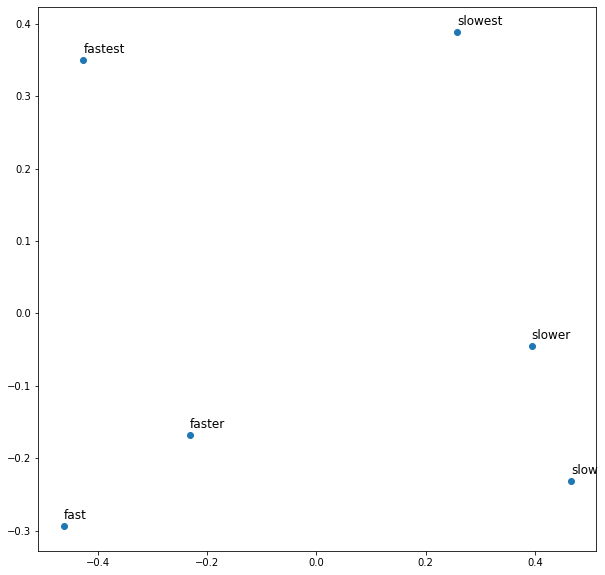

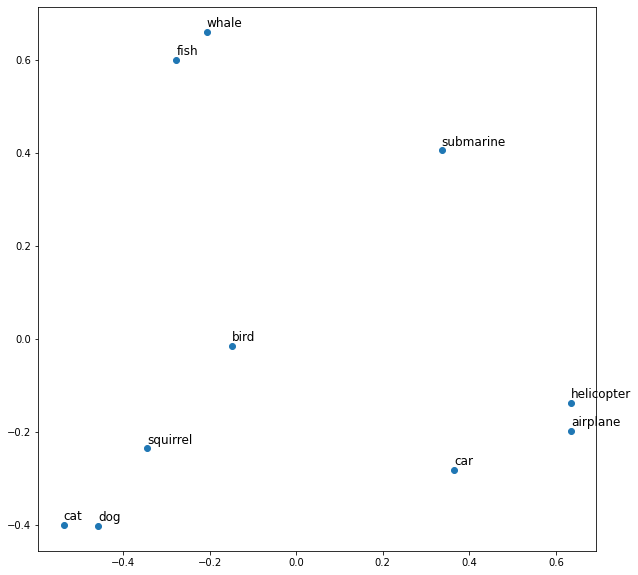

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def pcaPlot(word_list) :
    # fetch list of word vectors
    vecs = [words[x] for x in word_list]
    
    #reduce dimensions
    model = PCA(n_components = 2)
    reduced = model.fit_transform(vecs)
    xc = [v[0] for v in reduced]
    yc = [v[1] for v in reduced]
    
    # plot them
    plt.figure(figsize=(10,10))
    plt.scatter(xc, yc)

    # label the plot
    for i, word in enumerate(word_list) :
    	plt.annotate(word, xy=(xc[i], yc[i]+0.01), fontsize=12)
    plt.show()

pcaPlot(['fast','faster','fastest','slow','slower','slowest'])
pcaPlot(['bird', 'cat', 'squirrel', 'dog', 'fish', 'helicopter', 'airplane', 'car', 'submarine', 'whale'])
